# Veri Seti Hakkında
- Kahve Dükkanı Satışları
- Üç NYC lokasyonunda faaliyet gösteren hayali bir kahve dükkanı olan Maven Roasters için işlem kayıtları. 
- Veri kümesi, işlem tarihi, zaman damgası ve konumun yanı sıra ürün düzeyinde ayrıntıları da içerir.

# Veri Yükleme ve Kütüphaneler¶


In [3]:
import numpy as np
import pandas as pd   
import os           
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 
# Set a style for plots
sns.set(style="whitegrid")

# Veriyi Yukle ve Kontrol Et 2


In [5]:
#Dosyayı okuduk
df = pd.read_excel("Coffee Shop Sales.xlsx")

In [6]:
#Veri çerçevesi hakkında daha detaylı bilgiler sunar.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [7]:
#Pandas'ta bir veri çerçevesinin sütun etiketlerine erişim sağlayan bir özniteliktir.
df.columns 


Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [8]:
#Bu fonksiyon, DataFrame'in ilk 5 satırını gösterir. Ancak, içine bir sayı parametresi verirseniz, o kadar satır döndürür.
df.head(10) 


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [9]:
#Veri setinin varsayılan olarak son 5 satırını getirebilirdik fakan biz df.tail(10) ile son 10 satıra baktık.
df.tail(10) 


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149106,149447,2023-06-30,19:56:45,1,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg
149107,149448,2023-06-30,19:57:49,2,3,Astoria,54,2.50,Tea,Brewed Chai tea,Morning Sunrise Chai Rg
149108,149449,2023-06-30,19:57:49,1,3,Astoria,70,3.25,Bakery,Scone,Cranberry Scone
149109,149450,2023-06-30,20:08:38,2,8,Hell's Kitchen,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg
149110,149451,2023-06-30,20:16:31,2,5,Lower Manhattan,42,2.50,Tea,Brewed herbal tea,Lemon Grass Rg
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [10]:
df.describe()


,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


## Degisken Aciklamasi 3


In [12]:
 #veri çerçevesi hakkında daha detaylı bilgiler sunar.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


## Tek Degiskenli Degisken Analizi- Kategorik Degisken : product_category
- Numerik Degisken :satış fiyatı, ,Satılan ürün miktarı


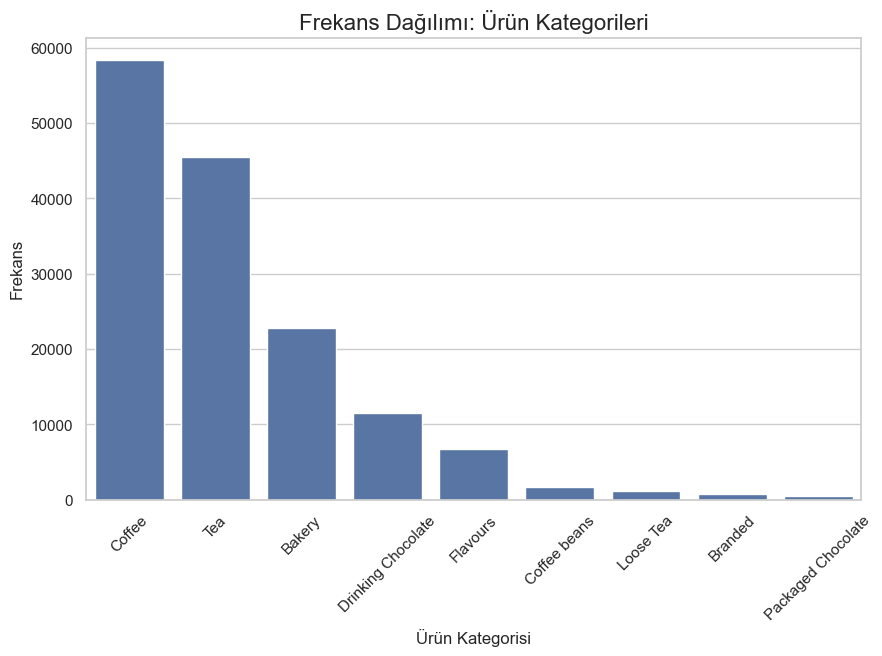

In [14]:
category_counts = df['product_category'].value_counts()

# Bar plot ürün kategory
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Frekans Dağılımı: Ürün Kategorileri", fontsize=16)
plt.xlabel("Ürün Kategorisi", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [15]:
# Temel istatistikler
numeric_summary = df[['unit_price', 'transaction_qty']].describe()
numeric_summary


,unit_price,transaction_qty
count,149116.000000,149116.000000
mean,3.382219,1.438276
std,2.658723,0.542509
min,0.800000,1.000000
25%,2.500000,1.000000
50%,3.000000,1.000000
75%,3.750000,2.000000
max,45.000000,8.000000


In [16]:
#toplam satılan çay miktarı
total_tea_sales = df[df['product_category'] == 'Tea']['transaction_qty'].sum()
total_tea_sales

69737

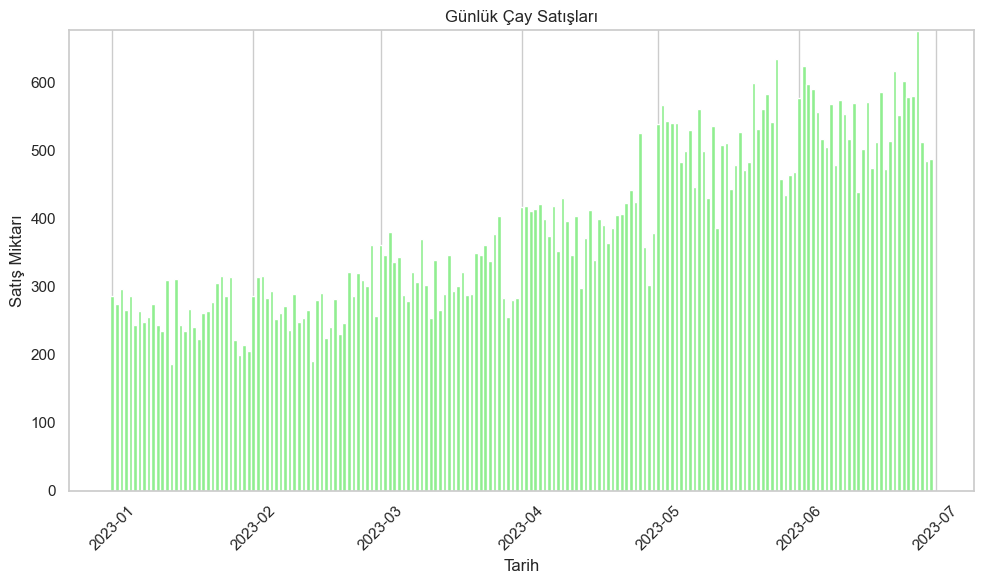

In [17]:
df2 = pd.DataFrame(df)
# Tarih sütununu datetime formatına çevir
df2['transaction_date'] = pd.to_datetime(df2['transaction_date'])
# 'Tea' kategorisindeki satışları grupla ve toplam miktarları hesapla
tea_sales_by_date = df2[df2['product_category'] == 'Tea'].groupby('transaction_date')['transaction_qty'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(tea_sales_by_date['transaction_date'], tea_sales_by_date['transaction_qty'], color='lightgreen')
plt.title('Günlük Çay Satışları')
plt.xlabel('Tarih')
plt.ylabel('Satış Miktarı')
plt.xticks(rotation=45)
plt.ylim(0, tea_sales_by_date['transaction_qty'].max() + 1) 
plt.grid(axis='y')
plt.tight_layout() 
plt.show()





# Eksik Degerler 4
- Eksik Degerleri Tespit Etme

In [19]:
# Eksik değer kontrolü
df.isnull().sum()


transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [20]:
 #Eksik deger olup olmadigini kontrol edecegiz.
df.columns[df.isnull().any()]


Index([], dtype='object')

# Benzersiz Degerler 5


In [22]:
df.product_category.unique() # veri setinde hangi tür içeceklerin yer  aldığını gorelim.


array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [23]:
df.product_category.unique().size  # veri setinde hangi tür içeceklerin yer  aldığını gorelim.


9

# Veri Gorsellestirme 6
- Burada genel olarak seaborn, matplotlib and plotly gibi gorsellestirme kütüphaneler kullanılacaktır.
-   
Plotly ile temel, standart ve premium paketlerin ulkelere gore fiyatlari gorsellestirildi

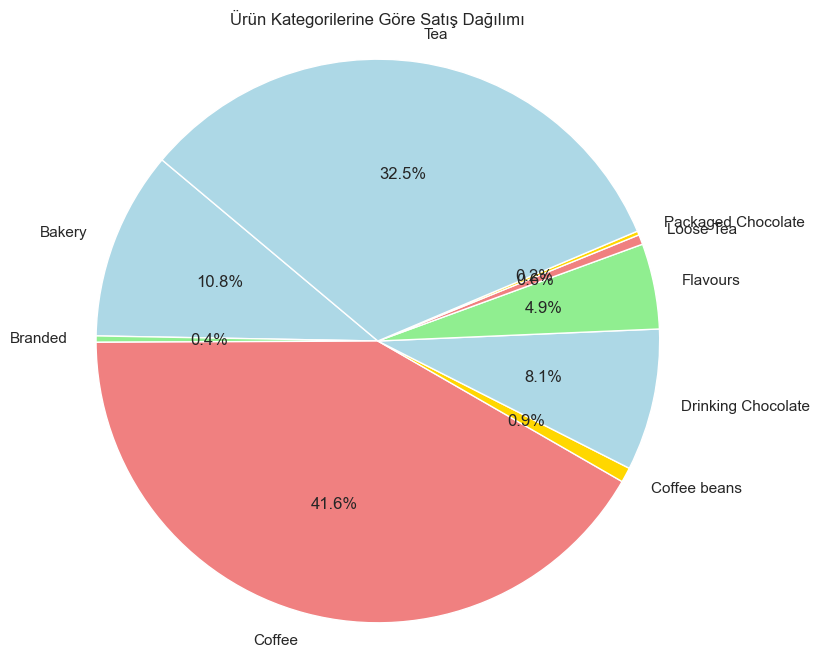

In [25]:
# Kategori bazında toplam satış miktarını hesapla
sales_per_category = df.groupby('product_category')['transaction_qty'].sum()

# Pasta grafik oluştur
plt.figure(figsize=(8, 8))
plt.pie(sales_per_category, labels=sales_per_category.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Ürün Kategorilerine Göre Satış Dağılımı')
plt.axis('equal')  # Eşit oranlı daire için

# Grafiği göster
plt.show()

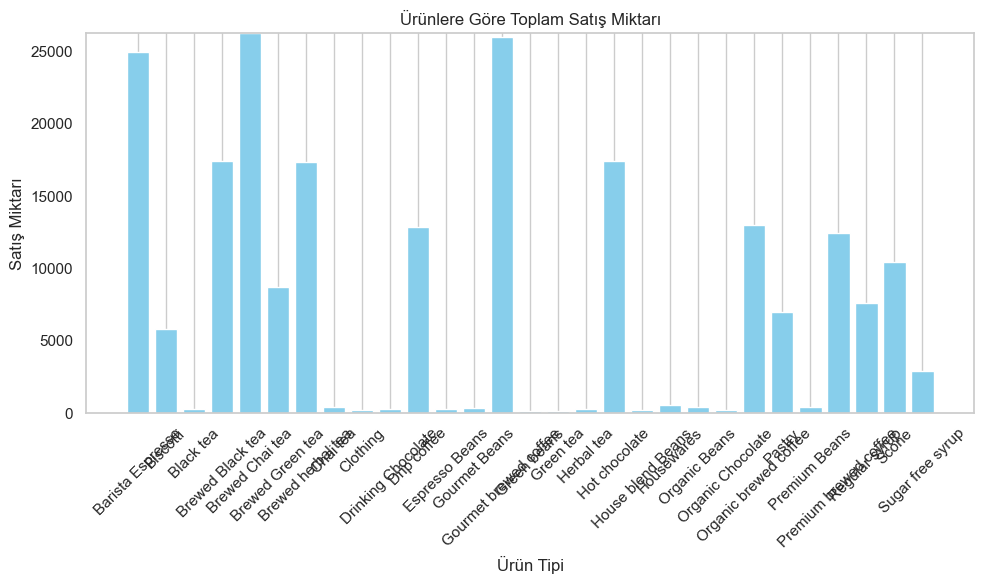

In [26]:

# Ürünlere göre toplam satış miktarını hesapla
total_sales_per_product = df.groupby('product_type')['transaction_qty'].sum().reset_index()

# Çubuk grafik oluştur
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_product['product_type'], total_sales_per_product['transaction_qty'], color='skyblue')
plt.title('Ürünlere Göre Toplam Satış Miktarı')
plt.xlabel('Ürün Tipi')
plt.ylabel('Satış Miktarı')
plt.xticks(rotation=45)
plt.ylim(0, total_sales_per_product['transaction_qty'].max() + 1)
plt.grid(axis='y')

# Grafiği göster
plt.tight_layout()
plt.show()

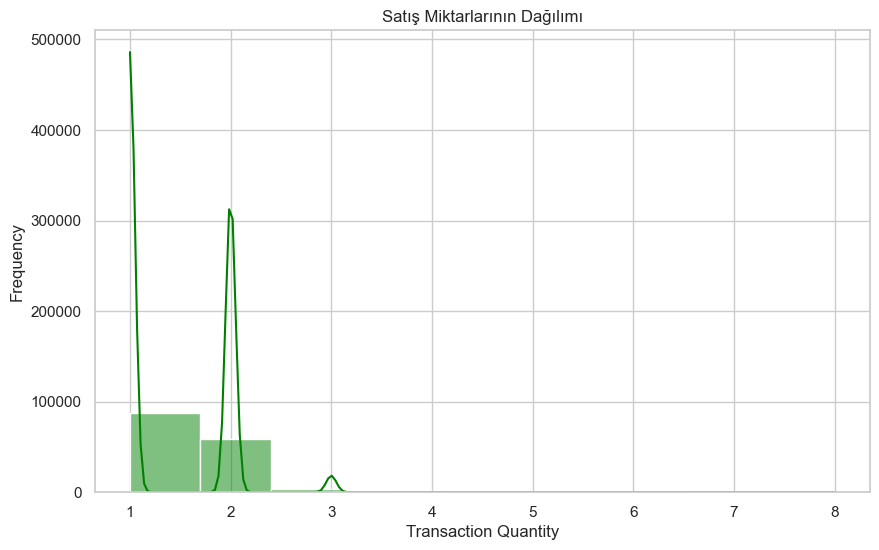

In [27]:
# Satış Miktarı Dağılımı (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_qty'], bins=10, kde=True, color='green')
plt.title("Satış Miktarlarının Dağılımı")
plt.xlabel("Transaction Quantity")
plt.ylabel("Frequency")
plt.show()

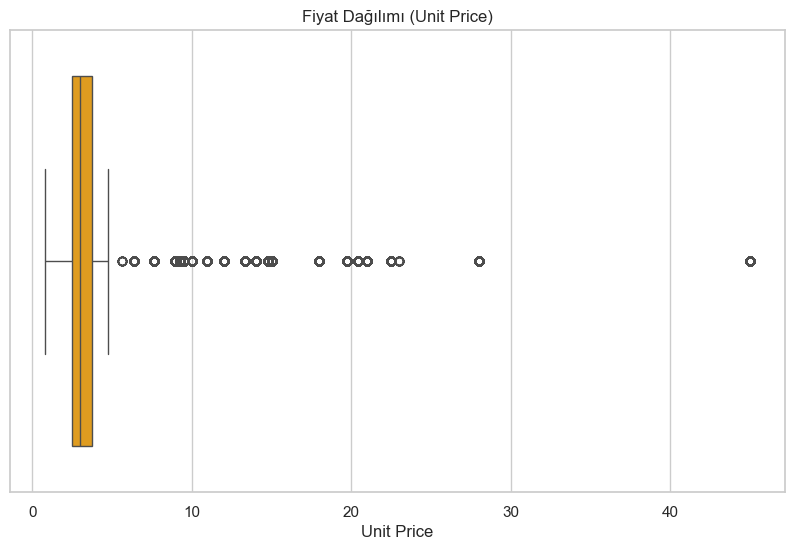

In [28]:
#  Fiyat Dağılımı (Kutu Grafiği)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['unit_price'], color='orange')
plt.title("Fiyat Dağılımı (Unit Price)")
plt.xlabel("Unit Price")
plt.show()

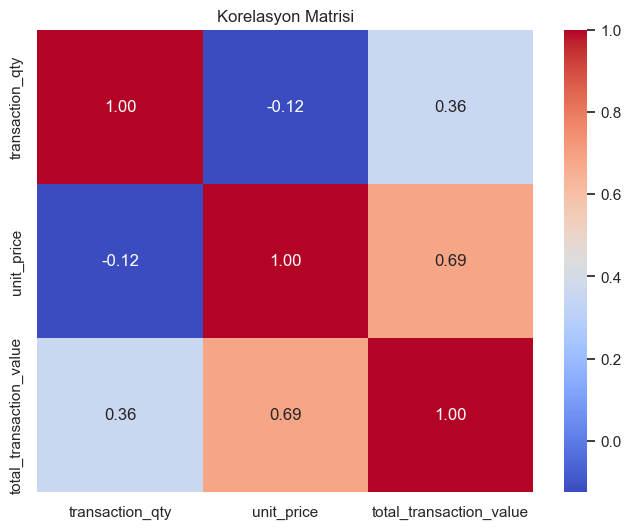

,transaction_qty,unit_price,total_transaction_value
transaction_qty,1.000000,-0.123546,0.356231
unit_price,-0.123546,1.000000,0.685550
total_transaction_value,0.356231,0.685550,1.000000


In [30]:
# Toplam işlem değerini hesapla
df['total_transaction_value'] = df['transaction_qty'] * df['unit_price']

# Korelasyon matrisi oluşturma
correlation_matrix = df[['transaction_qty', 'unit_price', 'total_transaction_value']].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Korelasyon Matrisi")
plt.show()

# Korelasyon matrisini yazdırma
correlation_matrix


- 1. transaction_qty ve unit_price Arasındaki Korelasyon:
Korelasyon Değeri: -0.12
Bu değer, zayıf negatif bir ilişkiyi gösterir. Yani, fiyat arttıkça satış miktarı bir miktar düşebilir. Ancak bu ilişki çok güçlü değildir, bu da fiyatın satış miktarları üzerinde belirgin bir etkisi olmadığını gösterir.
- 2. transaction_qty ve total_transaction_value Arasındaki Korelasyon:
Korelasyon Değeri: 0.36
Orta seviyede pozitif bir ilişki vardır. Satış miktarı arttıkça toplam satış değeri de artmaktadır. Yani, satışlar arttıkça toplam gelir artmaktadır, ancak bu ilişki daha düşük bir düzeyde bir etki yaratmaktadır.
- 3. unit_price ve total_transaction_value Arasındaki Korelasyon:
Korelasyon Değeri: 0.69
Güçlü bir pozitif korelasyon mevcuttur. Bu, fiyat arttıkça toplam satış değeri de artar. Yüksek birim fiyatları genellikle daha yüksek gelir elde edilmesine yol açar, bu yüzden fiyatın toplam satış değerine güçlü bir etkisi vardır.

## Genel Değerlendirme:
  Fiyat ve Satış Miktarı arasında zayıf negatif bir ilişki bulunmaktadır. Bu, fiyat arttıkça satış miktarının çok fazla değişmediği anlamına gelir.
Satış Miktarı ve Toplam Satış Değeri arasında orta düzeyde pozitif bir ilişki mevcuttur. Satış miktarı arttıkça toplam gelir artar.
Birim Fiyat ve Toplam Satış Değeri arasında güçlü bir pozitif ilişki vardır. Yüksek fiyatlar genellikle daha fazla gelir sağlar.
Bu analiz, ürün fiyatlarının satış gelirini nasıl etkilediğini anlamak açısından önemli ipuçları sağlar. Özellikle fiyatlandırma stratejileri belirlerken, fiyatın toplam satış değerini artırma potansiyelini göz önünde bulundurmak faydalı olacaktır.

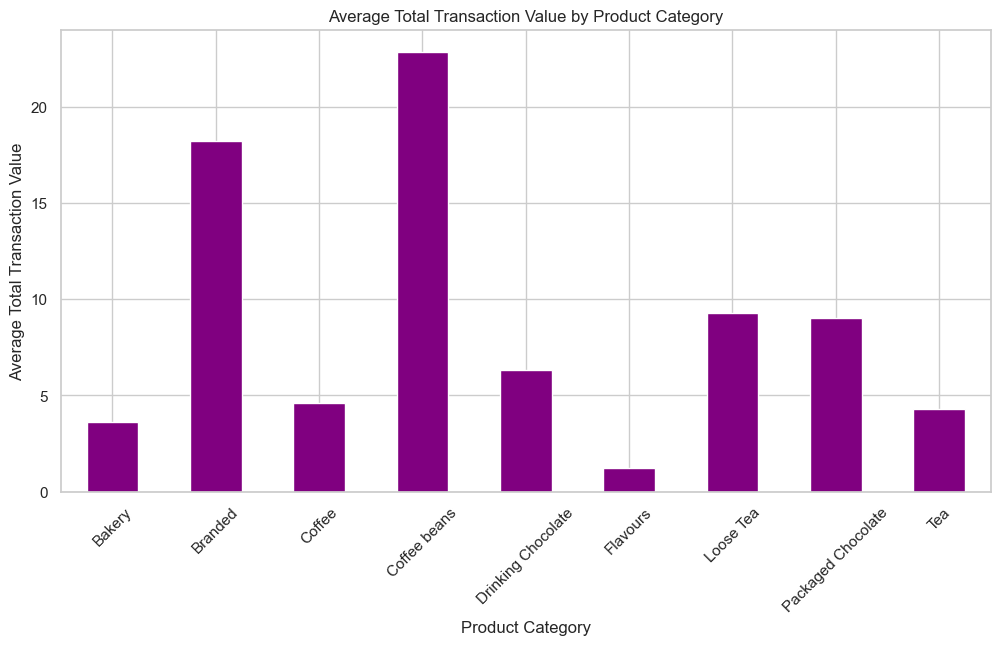

In [43]:
# Kategorik Grafik: Ürün Kategorilerine Göre Ortalama Satış Değeri
category_avg_sales = df.groupby('product_category')['total_transaction_value'].mean()

plt.figure(figsize=(12, 6))
category_avg_sales.plot(kind='bar', color='purple')
plt.title('Average Total Transaction Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Total Transaction Value')
plt.xticks(rotation=45)
plt.show()
